In [21]:
# 整理数据的库
import numpy as np
import pandas as pd
# 数据可视化的库
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 其它
import warnings
warnings.filterwarnings('ignore') #忽视警告

# 数据准备


In [6]:
df = pd.read_excel("./data/网新学子专业态度调查数据集/【单变量可视化及数据描述】网新学子专业态度调查.xlsx")

# 数据清洗与处理


In [7]:
# 定义函数方法:将数字和数字和代表含义一一映射

# high_school_major变量：1为文科，2为理科
def high_school_major(series):
    if series == 1:
        return '文科'
    else:
        return '理科'

# gender变量：1为男性，2为女性
def gender(series):
    if series == 1:
        return '男性'
    else:
        return '女性'
# hukou变量：1为城镇，2为非城镇
def hukou(series):
    if series == 1:
        return '城镇'
    else:
        return '非城镇'
# location变量：1为广东地区，2为珠三角地区，3为粤东，4为粤西，5为粤北
def location (series):
    if series == 1:
        return "非广东地区"
    elif series == 2:
        return "珠三角地区"
    elif series == 3:
        return "粤东"
    elif series == 4:
        return "粤西"
    else:
        return "粤北"
# like变量：1为喜欢，0为不喜欢
def like(series):
    if series == 1:
        return '喜欢'
    else:
        return '不喜欢'
# impr变量：1为有提升空间，0为挺好的
def impr(series):
    if series == 1:
        return '有提升空间'
    else:
        return '挺好的'


In [8]:
# 将high_school_major，gender,hukou,location变量转为“类别型变量”
df.high_school_major = df.high_school_major.apply(high_school_major).astype('category')
df.gender = df.gender.apply(gender).astype('category')
df.hukou = df.hukou.apply(hukou).astype('category')
df.location = df.location.apply(location).astype('category')

In [ ]:
# 看一下每一个变量对应的是第几个变量（变量名前的数字为其顺序）
for i in range(len(df.columns)):
    print(i,df.columns[i])

0 method
1 l_code
2 l_design
3 l_operation
4 l_production
5 l_copywriter
6 l_market
7 l_other
8 l_non
9 maj_work
10 maj_dir
11 cap_code
12 cap_design
13 cap_operation
14 cap_production
15 cap_copywriter
16 cap_market
17 ranking
18 effort_read
19 effort_info
20 effort_res
21 effort_project
22 effort_overall
23 sati_code
24 sati_design
25 sati_operation
26 sati_production
27 sati_copywriter
28 sati_market
29 sati_other
30 impr_code
31 impr_design
32 impr_operation
33 impr_production
34 impr_copywriter
35 impr_market
36 impr_other
37 sati_overall
38 grade
39 gender
40 spending
41 high_school_major
42 location
43 hukou


In [10]:
# 将以“l_”开头的变量（第1~9列的变量）转为“类别型变量”
for i in range(1,9):
    df.iloc[:,i] = df.iloc[:,i].apply(like).astype('category')

In [11]:
# 检查一下结果
df.filter(regex = "^l_.*")

,l_code,l_design,l_operation,l_production,l_copywriter,l_market,l_other,l_non
0,不喜欢,喜欢,喜欢,喜欢,喜欢,不喜欢,不喜欢,不喜欢
1,喜欢,不喜欢,喜欢,喜欢,不喜欢,不喜欢,不喜欢,不喜欢
2,不喜欢,喜欢,喜欢,喜欢,喜欢,不喜欢,不喜欢,不喜欢
3,不喜欢,不喜欢,喜欢,喜欢,喜欢,不喜欢,不喜欢,不喜欢
4,不喜欢,喜欢,不喜欢,不喜欢,不喜欢,不喜欢,不喜欢,不喜欢
...,...,...,...,...,...,...,...,...
75,喜欢,不喜欢,不喜欢,喜欢,不喜欢,不喜欢,不喜欢,不喜欢
76,不喜欢,不喜欢,喜欢,喜欢,不喜欢,不喜欢,不喜欢,不喜欢
77,喜欢,喜欢,喜欢,喜欢,不喜欢,不喜欢,不喜欢,不喜欢
78,不喜欢,喜欢,喜欢,喜欢,喜欢,喜欢,不喜欢,不喜欢


In [12]:
# 将以“impr_”开头的变量（第30~37列的变量）转成“类别型变量”
for i in range(30,37):
    df.iloc[:,i] = df.iloc[:,i].apply(impr).astype('category')

In [13]:
# 检查一下结果
df.filter(regex = "^impr_.*")

,impr_code,impr_design,impr_operation,impr_production,impr_copywriter,impr_market,impr_other
0,挺好的,有提升空间,有提升空间,有提升空间,有提升空间,有提升空间,挺好的
1,有提升空间,有提升空间,挺好的,挺好的,有提升空间,有提升空间,挺好的
2,挺好的,有提升空间,有提升空间,有提升空间,有提升空间,挺好的,挺好的
3,挺好的,挺好的,有提升空间,有提升空间,有提升空间,挺好的,挺好的
4,挺好的,有提升空间,挺好的,挺好的,有提升空间,挺好的,挺好的
...,...,...,...,...,...,...,...
75,有提升空间,挺好的,挺好的,有提升空间,挺好的,有提升空间,挺好的
76,挺好的,有提升空间,有提升空间,挺好的,挺好的,有提升空间,挺好的
77,有提升空间,挺好的,有提升空间,有提升空间,挺好的,有提升空间,挺好的
78,挺好的,有提升空间,挺好的,挺好的,挺好的,有提升空间,挺好的


# 单变量的数据描述与可视化


## 类别型变量：数据描述

In [31]:
df.location = df.location.astype("category")
df.gender = df.gender.astype("category")

In [32]:
table_gender = df.gender.value_counts()
table_gender

gender
女性    64
男性    16
Name: count, dtype: int64

<strong style="color:red;">课堂练习</strong>

对`hukou`变量和`method`变量进行频数统计

## 类别型变量：饼状图

<Axes: ylabel='count'>

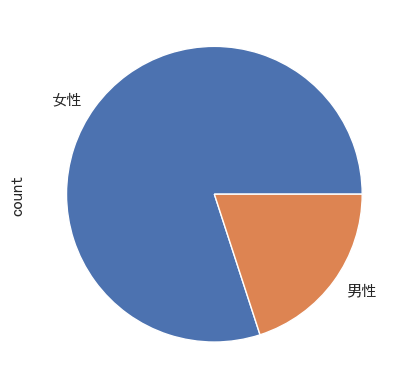

In [22]:
table_gender.plot.pie()

<strong style="color:red;">课堂练习</strong>

对`hukou`变量绘制饼状图

## 类别型变量：条形图

<Axes: xlabel='location', ylabel='count'>

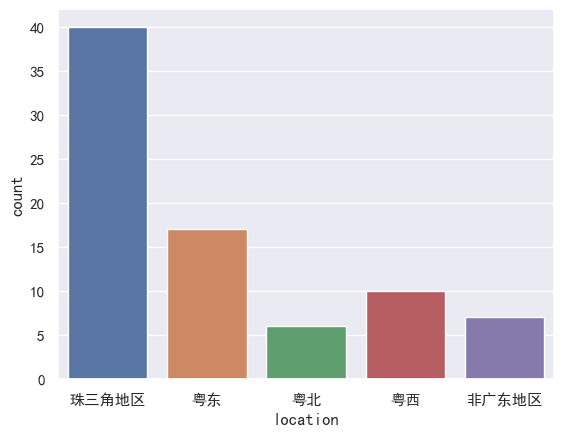

In [23]:
sns.countplot(x = "location",data = df)

<strong style="color:red;">课堂练习</strong>

对`method`变量绘制柱形图

## 数值型变量:数据描述

In [24]:
# 返回单个变量的描述性统计结果
df["effort_overall"].describe()

count    80.000000
mean      3.175000
std       0.707554
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: effort_overall, dtype: float64

<strong style="color:red;">课堂练习</strong>

对`spending`变量进行数据描述

## 类别型变量：直方图

<Axes: xlabel='effort_overall', ylabel='Count'>

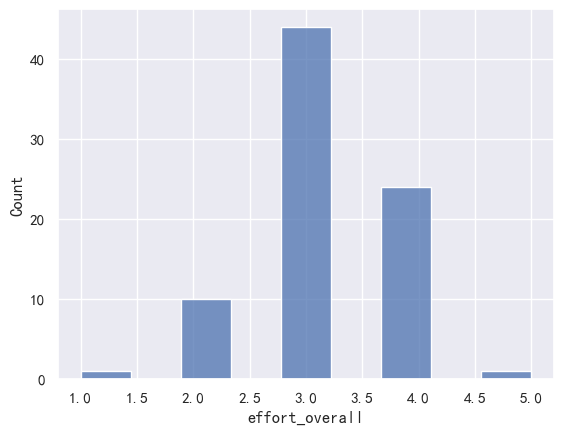

In [25]:
sns.histplot(x = "effort_overall",data=df)

<strong style="color:red;">课堂练习</strong>

对`spending`变量绘制直方图

# 双变量的数据描述与可视化


## 类别变量 + 数值型变量 ：分组计算统计量，箱型图


In [26]:
# “城镇户口”和“非城镇户口”的同学学习成绩描述
df.groupby('hukou').ranking.mean()

hukou
城镇     3.40
非城镇    2.92
Name: ranking, dtype: float64

<Axes: xlabel='hukou', ylabel='ranking'>

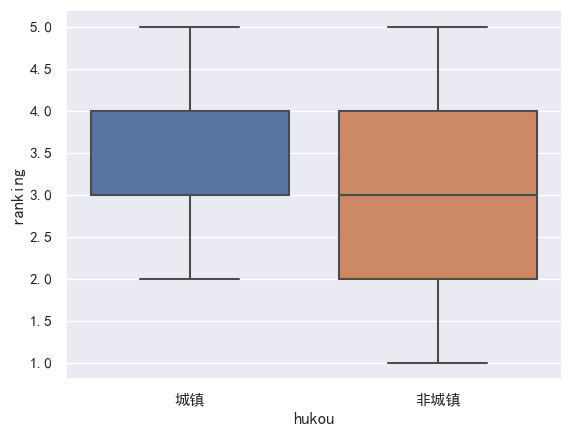

In [ ]:
## 箱型图
sns.boxplot(x = 'hukou', y = 'ranking', data = df) 

<strong style="color:red;">课堂练习</strong>

依据以下变量进行分组统计量计算和箱型图绘制：高中分科（`high_school_major`变量） + 毕业后从事本专业相关工作倾向（`maj_work`变量）


## 类别型变量 + 数值型变量 ：列联表，簇状柱形图


In [28]:
# 列联表
crosstab = pd.crosstab(df.gender,df.high_school_major)
crosstab


high_school_major,文科,理科
gender,,
女性,37,27
男性,8,8


<Axes: xlabel='gender', ylabel='count'>

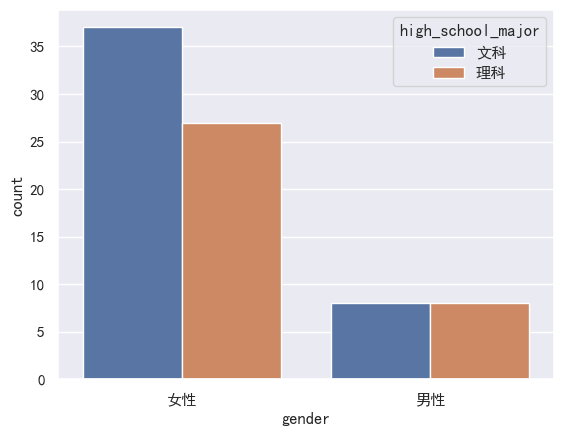

In [29]:
# 
sns.countplot(x = 'gender', hue = 'high_school_major', data = df) 

<strong style="color:red;">课堂练习</strong>

依据以下变量进行列联表计算和簇状柱形图绘制：高中分科（ `high_school_major`） + 是否喜欢设计类课程（ `l_design`）


## 数值型变量 + 数值型变量：相关系数，散点图


<Axes: xlabel='effort_overall', ylabel='ranking'>

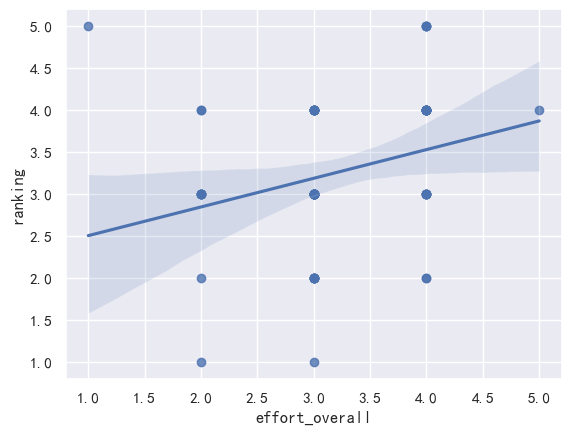

In [34]:
sns.regplot(x = "effort_overall", y = "ranking", data = df)

<strong style="color:red;">课堂练习</strong>

依据以下变量进行散点图（带拟合直线）绘制：网新专业课程满意度（ `sati_overall`） + 毕业后从事本专业相关工作倾向（ `maj_work`）
